# Final Practice
Today is all about practice.
You are given:
- a set of people that registered to your authentication system
    - with the file "people.csv" containing all their info
    - their associated reference embeddings in "people_embeddings.npy"
- a set of connections that will be used to train and validate the defense systems you deemed useful. This includes:
    - The file describing their connections: "train_connections.csv"
    - The associated connection embeddings: "train_connections_embeddings.npy"
- a test set of connections. The main question here is: which one of those test connections would you allow in? The set includes:
    - The file describing their connections: "test_connections.csv"
    - The associated connection embeddings: "test_connections_embeddings.npy"
    
Your mission is to produce a list of booleans 'predicted_test_labels', of the same length as the 'test_connections.csv', each boolean being True if you let then connection in and False otherwise. <br>
Use the "eval(predicted_test_labels)" function to get the accuracy of your system.

In [2]:
#Import packages
import numpy as np
import pandas as pd

# load the files train_connections.csv and train_connections_embeddings.npy
train_connections = pd.read_csv('train_connections.csv')
train_connections_embeddings = np.load('train_connections_embeddings.npy')

train_connections.head()

,logins,passwords,ips,dates,true_attempt
0,amiyah_jamir@email.com,Louisa4Ev&r,193.239.147.19,18:44:25 16-06-2021,True
1,harrison_jack@email.com,14071956,38.232.242.155,04:59:52 12-10-2022,True
2,adan_zion@email.com,AZI0N40,147.243.14.70,11:37:58 06-06-2021,True
3,victoria_julien@email.com,1234,185.211.98.67,02:13:02 04-12-2021,True
4,brucha_marielle@email.com,qwerty,138.23.37.163,22:48:52 24-08-2019,True


In [3]:
#Get length of train_connections
len(train_connections)

33401

In [4]:
#gwt length of train_connections_embeddings
len(train_connections_embeddings)

33401

In [5]:
#get shape of train_connections_embeddings
train_connections_embeddings.shape

(33401, 128)

In [6]:
train_labels = list(train_connections['true_attempt'].values)

print(set(train_labels))

temp = []

for label in train_labels:
    
    temp.append(label*1)
    
print(set(temp))

train_labels = temp

{False, True}
{0, 1}


In [7]:
#size check
print("Sanity Check:", len(train_labels) == len(train_connections_embeddings))
print("Size:", len(train_labels))

Sanity Check: True
Size: 33401


In [8]:
# reduce the number of samples to 1000
#train_connections_embeddings = train_connections_embeddings[:1000]
#train_labels = train_labels[:1000]

In [9]:
#Load test embeddings

test_connections = pd.read_csv('test_connections.csv')
test_connections_embeddings = np.load('test_connections_embeddings.npy')

test_connections.head()


,logins,passwords,ips,dates
0,lara_goldy@email.com,22qtd)MVD[8,75.125.37.218,19:02:01 29-04-2024
1,jaime_diego@email.com,Giovann@1977,69.205.22.185,23:36:55 21-07-2024
2,frank_aria@email.com,Queen1&4Ever,204.240.156.104,06:12:06 02-03-2024
3,leila_carmen@email.com,LCARMEN44,136.228.181.223,08:15:56 02-05-2024
4,chace_maliyah@email.com,Chace1984,144.57.33.49,15:50:20 19-04-2024


In [10]:
#load people.csv

people = pd.read_csv('people.csv')

people.head()


,names,surnames,ips,passwords,logins
0,Amir,REIZY,213.176.54.43,25061982,amir_reizy@email.com
1,Yisroel,MARYAM,45.56.0.57,12121974,yisroel_maryam@email.com
2,Hunter,KEYLA,47.246.165.148,27011965,hunter_keyla@email.com
3,Holden,TENZIN,129.134.90.220,Amanda4Ever,holden_tenzin@email.com
4,Noel,OPHELIA,54.239.140.108,azerty,noel_ophelia@email.com


In [11]:
# get uniqe people values in people

people_unique = list(set(people['ips'].values))
len(people_unique)

people_unique = list(set(people['logins'].values))
len(people_unique)


1000

In [12]:
#create a mapping of ip to person_id
ip_to_person_id = {}

for index, row in people.iterrows():
    ip_to_person_id[row['ips']] = row['logins']

print(len(ip_to_person_id))

1000


In [13]:
# create test labels
test_labels = []

people = []

for index, row in test_connections.iterrows():
    ip = row['ips']
    person = row['logins']

    



    if ip in ip_to_person_id and ip_to_person_id[ip] == person:
        test_labels.append(1)
    else:
        test_labels.append(0)

print(len(test_labels))
    

6599


In [14]:
import xgboost as xgb

#Create X and y
X = train_connections_embeddings
y = train_labels

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X, y)

#Predict on test data

predicted_test_labels = xgb_model.predict(test_connections_embeddings)








In [26]:
import tensorflow as tf
from tensorflow import keras


# Define the model
model = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.1),  # Dropout for regularization
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

model.build(input_shape=(None, 128))
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# produce prediction on test data after each epoch 

# make callback

class PredictionCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("Predictions for epoch {}:".format(epoch+1))
        predictions = model.predict(validation_x)
        print(predictions)
        a = []
        for val in predictions:
            a.append(round(val[0] + 0.1))
        print(a)
        eval(a)
        print("\n")
    

train_x = np.asarray(train_connections_embeddings)
train_y = np.asarray(train_labels)
validation_x = np.asarray(test_connections_embeddings)
#validation_y = np.asarray(validation_y)


# train the model
model.fit(train_x, train_y, epochs=40, callbacks=[PredictionCallback()])



# To make predictions:
predictions = model.predict(test_connections_embeddings)


a = []
for val in predictions:
    
    a.append(round(val[0]))

eval(a)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dropout_40 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 128)               16512     
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 32)              

In [38]:
# create an autoencoder with keras

model = keras.models.Sequential([
    keras.layers.Dense(128, activation='elu', input_shape=(128,)),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(32, activation='linear'),
    keras.layers.Dense(64, activation='elu'),
    keras.layers.Dense(128, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Summary of the model

model.summary()

# train the model

model.fit(train_connections_embeddings, train_connections_embeddings, epochs=2)

# get the embeddings for the test data

train_connections_embeddings = model.predict(train_connections_embeddings)




Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 128)               16512     


                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 dense_83 (Dense)            (None, 64)                2112      
                                                                 
 dense_84 (Dense)            (None, 128)               8320      
                                                                 
Total params: 37280 (145.62 KB)
Trainable params: 37280 (145.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2
1044/1044 [==============================] - 2s 1ms/step - loss: 3.6619 - accuracy: 0.0353
Epoch 2/2
1044/1044 [==============================] - 1s 770us/step


In [39]:
# run xbboost on the new embeddings

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(train_connections_embeddings, train_labels)

#Predict on test data

dimensionality_reduced_test_labels = model.predict(test_connections_embeddings)

predicted_test_labels = xgb_model.predict(dimensionality_reduced_test_labels)




207/207 [==============================] - 0s 776us/step


## Evaluation
Once you have your 'predicted_test_labels' list, you can use the eval function below:

In [36]:
def eval(predicted_test_labels):
    targets = np.load('solution.npy')
    accuracy = np.sum(targets==predicted_test_labels)/len(predicted_test_labels)
    print(f"The accuracy of your system is {100*accuracy}%!")
    
eval(predicted_test_labels)

The accuracy of your system is 75.05682679193816%!


Our accuracy is not great right now, because we accept everyone! but I'm sure you can improve from there! 

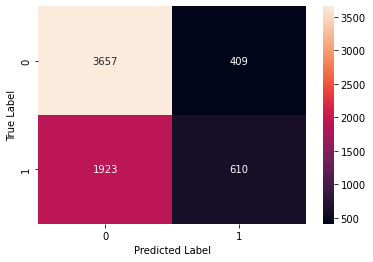

In [ ]:
# make a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, predicted_test_labels)

# plot it nicely

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(test_labels, predicted_test_labels), annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

